# fdsreader Module

In order to analyse simulation data computed by FDS with Python, we have developed the Python module fdsreader. It's aim is to read most data output formats generated by FDS and map them to Python data structures.

It is freely available and open source. The source code is hosted at GitHub: [FireDynamics/fdsreader](https://github.com/FireDynamics/fdsreader).

## Installation

The fdsreader module can be installed via pip (see also the GitHub repository):

```
pip install fdsreader
```

However, it is already installed on all JupyterLab instances used for this lecture.

## Demo Data Set

To demonstrate the usage of the fdsreader module, a simple FDS scenario is utilized:

```{literalinclude} ../../../../data/fdsreader/example_01/example_01.fds
```

## Open a Data Set

First the fdsreader module needs to be loaded:

In [1]:
import fdsreader

The version of (any) the module can be checked with:

In [2]:
print(fdsreader.__version__)

1.0.10


Next, the reader needs to be pointed to the directory, which contains the simulation data, especailly the smokeview file:

In [3]:
# define the path to the data
path_to_data = '../../../../data/fdsreader/example_01/rundir'

sim = fdsreader.Simulation(path_to_data)

```{tip} You can use the autocomplete function in Jupyter.
```

The `Simulation` object `sim` contains now all the information and data about the simulaiton output:

In [4]:
print(sim)

Simulation(chid=output_fdsreader_example,
           meshes=1,
           slices=2,
           devices=6)


It contains information about a single mesh (`MESH`), two slices (`SLCF`) and six point measurements (`DEVC`). The additional device – there were just five defined in the input file – is the time stemp. 

## `DEVC` Data

The simplest data set is the output of the `DEVC` directives. The available data and meta information can be directly printed:

In [10]:
# short reference
devc = sim.devices
print(devc)

{'Time': Device(name=Time, position=(0.0, 0.0, 0.0), quantity=Quantity('Time'), mean=5.4907660484313965), 'T_1.0': Device(name=T_1.0, position=(0.0, 0.0, 1.0), quantity=Quantity('T_1.0'), mean=804.3012084960938), 'T_2.0': Device(name=T_2.0, position=(0.0, 0.0, 2.0), quantity=Quantity('T_2.0'), mean=691.8992919921875), 'T_3.0': Device(name=T_3.0, position=(0.0, 0.0, 3.0), quantity=Quantity('T_3.0'), mean=479.3949279785156), 'T_4.0': Device(name=T_4.0, position=(0.0, 0.0, 4.0), quantity=Quantity('T_4.0'), mean=334.0716857910156), 'T_5.0': Device(name=T_5.0, position=(0.0, 0.0, 5.0), quantity=Quantity('T_5.0'), mean=240.62425231933594)}


In [14]:
for i in devc:
    print(f"name: {devc[i].name},\t position: {devc[i].position}")

name: Time,	 position: (0.0, 0.0, 0.0)
name: T_1.0,	 position: (0.0, 0.0, 1.0)
name: T_2.0,	 position: (0.0, 0.0, 2.0)
name: T_3.0,	 position: (0.0, 0.0, 3.0)
name: T_4.0,	 position: (0.0, 0.0, 4.0)
name: T_5.0,	 position: (0.0, 0.0, 5.0)


```{tip} Autocomplete works also for the dictionary keys ;-)
```
A raw look at the data (`Device.data`), which is stored as a numpy array:

In [18]:
print(type(devc['Time'].data))

<class 'numpy.ndarray'>


In [19]:
print(devc['Time'].data.shape)

(602,)


In [16]:
devc["Time"].data

array([ 0.        ,  0.1       ,  0.2       ,  0.3       ,  0.4       ,
        0.5       ,  0.6       ,  0.7       ,  0.8       ,  0.9       ,
        0.97940284,  1.0490968 ,  1.1105819 ,  1.1720669 ,  1.233552  ,
        1.27252   ,  1.311488  ,  1.3441169 ,  1.3767458 ,  1.4093747 ,
        1.4452664 ,  1.4749194 ,  1.5045723 ,  1.531071  ,  1.5575697 ,
        1.5799627 ,  1.6023557 ,  1.6247487 ,  1.6444938 ,  1.6642389 ,
        1.6839839 ,  1.703729  ,  1.723474  ,  1.7432191 ,  1.7629641 ,
        1.7827092 ,  1.8024544 ,  1.8221993 ,  1.8419445 ,  1.8616894 ,
        1.8814344 ,  1.9011796 ,  1.9209245 ,  1.9406697 ,  1.9604146 ,
        1.9801598 ,  1.9999048 ,  2.01965   ,  2.0393949 ,  2.05914   ,
        2.0748444 ,  2.090549  ,  2.1062534 ,  2.1219578 ,  2.1356995 ,
        2.149441  ,  2.1631825 ,  2.1769242 ,  2.1906657 ,  2.2044075 ,
        2.2181492 ,  2.2318907 ,  2.2456324 ,  2.259374  ,  2.2731154 ,
        2.2868571 ,  2.3005986 ,  2.3143404 ,  2.329456  ,  2.34

The device data can be also visualised with matplotlib:

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

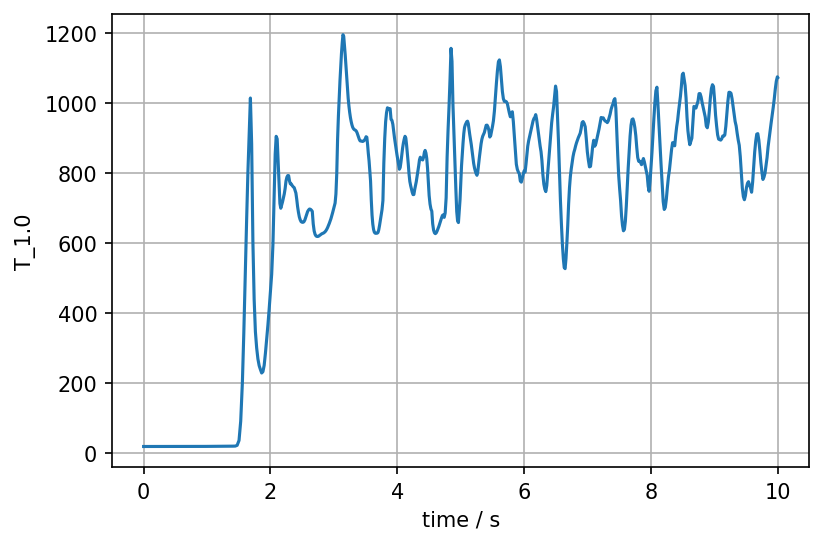

In [28]:
plt.plot(devc["Time"].data, devc["T_1.0"].data)
plt.xlabel("time / s")
plt.ylabel(devc["T_1.0"].name)
plt.grid()

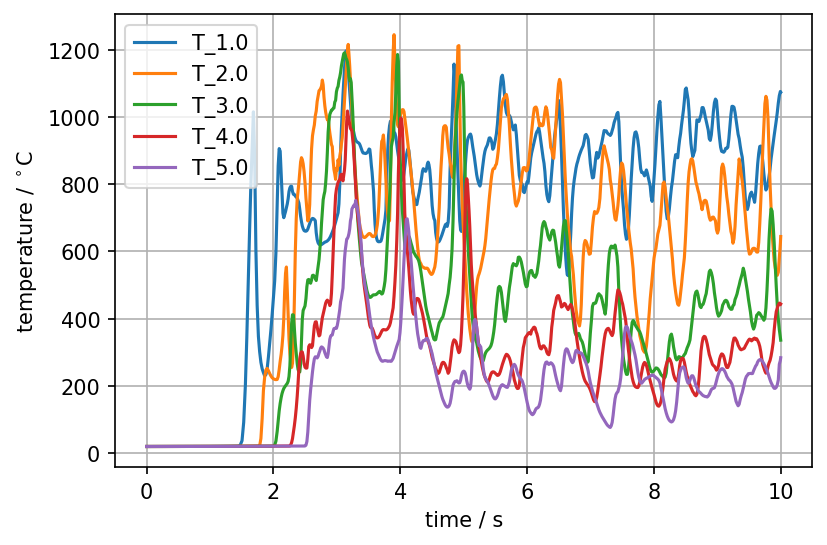

In [31]:
for i in devc:
    
    # consider only devices with an ID that starts with 'T_'
    if not i.startswith('T_'): 
        continue
    
    plt.plot(devc["Time"].data, devc[i].data, label=devc[i].name)
    
plt.legend()
plt.xlabel("time / s")
plt.ylabel('temperature / $^\circ$C')
plt.grid()

## HRR Data

In the same fashion as the `DEVC` data, the data written to the `HRR` file can be directly accessed:

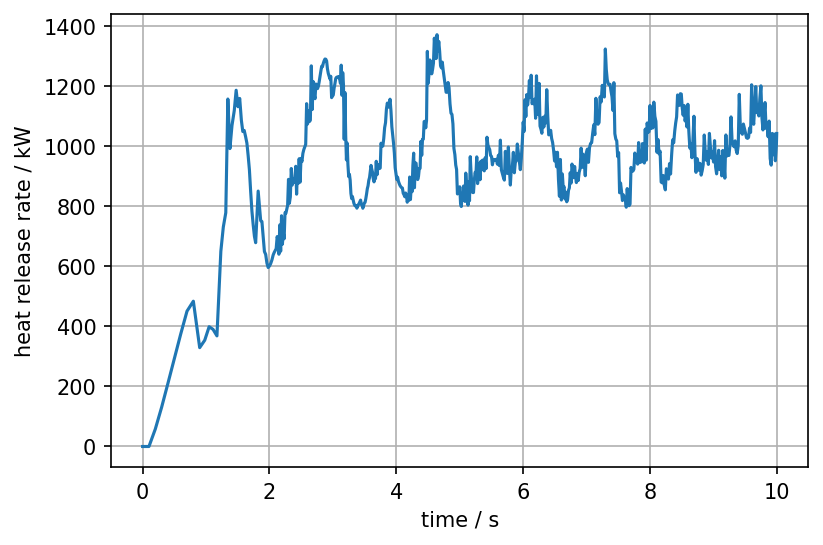

In [32]:
plt.plot(sim.hrr['Time'].data, sim.hrr['HRR'].data)
plt.xlabel('time / s')
plt.ylabel('heat release rate / kW')
plt.grid()